<a href="https://colab.research.google.com/github/makeilasandoval7394-debug/Heart-Disease-Dataset-Analysis/blob/main/Python_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
import pandas as pd

# Upload the file
uploaded = files.upload()

Saving yes.csv to yes.csv


In [ ]:
df = pd.read_csv('yes.csv')

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


# A little dictionary since I'm sure we aren't medical professional here

| Variable        | Definition                                                                                                           |
| --------------- | -------------------------------------------------------------------------------------------------------------------- |
| **cp**          | Chest pain type (categorical: e.g., 1 = typical angina, 2 = atypical angina, 3 = non-anginal pain, 4 = asymptomatic) |
| **trestbps**    | Resting blood pressure (in mm Hg, measured on admission to the hospital)                                             |
| **chol**        | Serum cholesterol in mg/dl                                                                                           |
| **fbs**         | Fasting blood sugar (>120 mg/dl; 1 = true, 0 = false)                                                                |
| **restecg**     | Resting electrocardiographic results (e.g., 0 = normal, 1 = ST-T wave abnormality, 2 = left ventricular hypertrophy) |
| **thalch**      | Maximum heart rate achieved during exercise                                                                          |
| **exang**       | Exercise-induced angina (1 = yes, 0 = no)                                                                            |
| **oldpeak**     | ST depression induced by exercise relative to rest (a measure of exercise-induced ischemia)                          |
| **slope**       | Slope of the peak exercise ST segment (1 = upsloping, 2 = flat, 3 = downsloping)                                     |
| **num**         | Diagnosis of heart disease (target variable; 0 = no disease, 1–4 = increasing severity of disease)                   |
| **age_group**   | Age categorized into groups (e.g., 20–30, 31–40, etc.) — a derived variable for analysis convenience                 |
| **has_disease** | Simplified binary target variable (1 = presence of heart disease, 0 = absence of heart disease)                      |


Cleaing data

In [ ]:
# Check all rows and determine non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [ ]:
# Check for null values
df.isnull().sum().sort_values(ascending=False)


,0
ca,611
thal,486
slope,309
fbs,90
oldpeak,62
trestbps,59
exang,55
thalch,55
chol,30
restecg,2


In [ ]:
#Both of these columns are missing over 50% of the data. This isn't a strict medical analysis so they will be dropped
df = df.drop(columns=['ca'])
df= df.drop(columns=['thal'])

In [ ]:
#The remaining rows with null-values will be filled filled with median, mode or mean
#Numeric columns
df['oldpeak'] = df['oldpeak'].fillna(df['oldpeak'].median())
df['chol'] = df['chol'].fillna(df['chol'].median())
df['trestbps'] = df['trestbps'].fillna(df['trestbps'].mean())
df['thalch'] = df['thalch'].fillna(df['thalch'].mean())

# Mode for the slope column since it comforts the entire data and is safe fopr outliers
df['slope'] = df['slope'].fillna(df['slope'].mode()[0])

#Categorical columns
df['fbs'] = df['fbs'].fillna(df['fbs'].mode()[0])
df['exang'] = df['exang'].fillna(df['exang'].mode()[0])
df['restecg'] = df['restecg'].fillna(df['restecg'].mode()[0])


/tmp/ipython-input-198101990.py:12: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['fbs'] = df['fbs'].fillna(df['fbs'].mode()[0])
/tmp/ipython-input-198101990.py:13: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['exang'] = df['exang'].fillna(df['exang'].mode()[0])


In [ ]:
# Check cleaning
print(df.isnull().sum())

id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
num         0
dtype: int64


In [ ]:
#Check for duplicates
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

# if for safety
if duplicate_count > 0:
    df.drop_duplicates(inplace=True)
    print("Duplicates dropped.")
else:
    print("No duplicates found. All records are unique.")



Number of duplicate rows: 0
No duplicates found. All records are unique.



Cleaning complete


Data Manipulation and Visualization

In [ ]:
#Sort the dataframe a bit
df_sorted = df.sort_values(by='age', ascending=False)

In [ ]:
# Filter patients under 50
under_50 = df_sorted[df_sorted['age']<50]
print(under_50)

      id  age     sex    dataset               cp  trestbps   chol    fbs  \
410  411   49    Male    Hungary     asymptomatic     120.0  297.0  False   
405  406   49  Female    Hungary  atypical angina     110.0  223.0  False   
409  410   49    Male    Hungary      non-anginal     140.0  187.0  False   
411  412   49    Male    Hungary     asymptomatic     140.0  223.0  False   
513  514   49    Male    Hungary      non-anginal     115.0  265.0  False   
..   ...  ...     ...        ...              ...       ...    ...    ...   
306  307   30  Female    Hungary   typical angina     170.0  237.0  False   
305  306   29    Male    Hungary  atypical angina     140.0  223.0  False   
304  305   29    Male    Hungary  atypical angina     120.0  243.0  False   
132  133   29    Male  Cleveland  atypical angina     130.0  204.0  False   
303  304   28    Male  Cleveland  atypical angina     130.0  132.0  False   

              restecg  thalch  exang  oldpeak      slope  num  
410        

In [ ]:
#Filter patients over 50
over_50 = df_sorted[df_sorted['age']>50]
print(over_50)

      id  age     sex        dataset              cp    trestbps   chol  \
751  752   77    Male  VA Long Beach    asymptomatic  124.000000  171.0   
161  162   77    Male      Cleveland    asymptomatic  125.000000  304.0   
257  258   76  Female      Cleveland     non-anginal  140.000000  197.0   
845  846   76    Male  VA Long Beach     non-anginal  104.000000  223.0   
810  811   75    Male  VA Long Beach    asymptomatic  136.000000  225.0   
..   ...  ...     ...            ...             ...         ...    ...   
59    60   51    Male      Cleveland  typical angina  125.000000  213.0   
797  798   51    Male  VA Long Beach     non-anginal  132.132404  339.0   
156  157   51    Male      Cleveland    asymptomatic  140.000000  299.0   
780  781   51    Male  VA Long Beach    asymptomatic  132.132404  218.0   
191  192   51    Male      Cleveland    asymptomatic  140.000000  298.0   

       fbs           restecg      thalch  exang  oldpeak        slope  num  
751  False  st-t abnor

In [ ]:
# I'm going to categorize patients into age ranges
bins = [0, 40, 50, 60, 70, 100]
labels = ['<40', '40–49', '50–59', '60–69', '70+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)


In [ ]:
#Identify which patients have heart disease by creating new column
df['has_disease'] = df['num'].apply(lambda x: 1 if int(x) > 0 else 0)


/tmp/ipython-input-3585961466.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('age_group')['has_disease'].mean()
/tmp/ipython-input-3585961466.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['sex', 'age_group'])['has_disease'].mean().unstack()
/tmp/ipython-input-3585961466.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sns.heatmap(df.groupby(['sex', 'age_group'])['has_disease'].mean().

Text(50.722222222222214, 0.5, 'Sex')

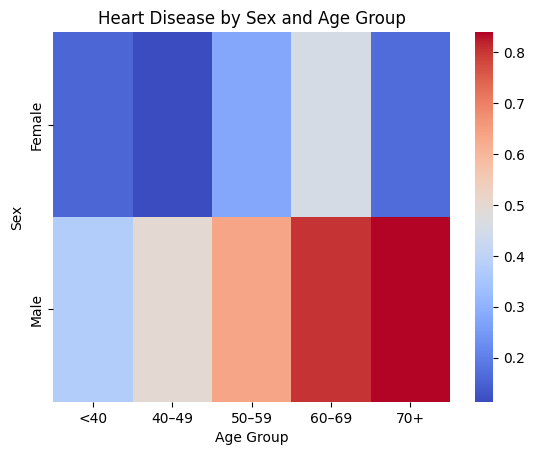

In [ ]:
#Use heart disease column for some findings
df.groupby('age_group')['has_disease'].mean()

df.groupby(['sex', 'age_group'])['has_disease'].mean().unstack()

sns.heatmap(df.groupby(['sex', 'age_group'])['has_disease'].mean().unstack(), cmap='coolwarm')

plt.title("Heart Disease by Sex and Age Group")
plt.xlabel("Age Group")
plt.ylabel("Sex")


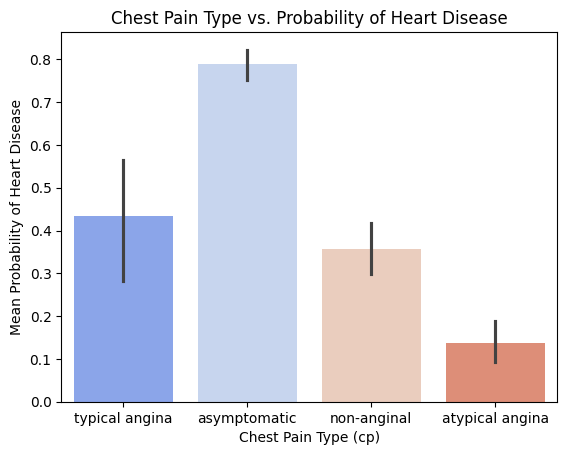

In [ ]:
# Chest pain and heart disease
df.groupby('cp')['has_disease'].mean().sort_values(ascending=False)

sns.barplot(x='cp', y='has_disease', data=df, hue = 'cp', palette = "coolwarm")

plt.title("Chest Pain Type vs. Probability of Heart Disease")
plt.xlabel("Chest Pain Type (cp)")
plt.ylabel("Mean Probability of Heart Disease")
plt.show()

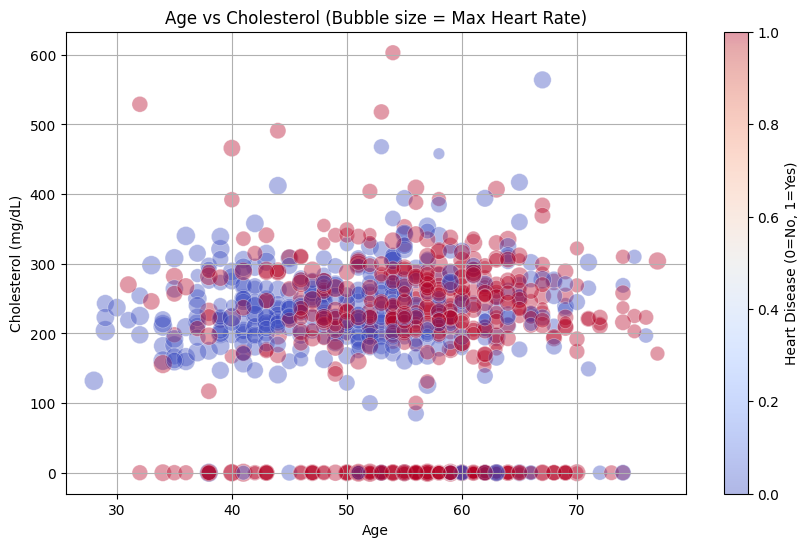

In [ ]:
# A scatter plot cuz why not
plt.figure(figsize=(10,6))
plt.scatter(x=df['age'],y=df['chol'],s=df['thalch'],c=df['has_disease'],cmap='coolwarm',
    alpha=0.4,
    edgecolors='w',
    linewidth=0.5
)

plt.title("Age vs Cholesterol (Bubble size = Max Heart Rate)")
plt.xlabel("Age")
plt.ylabel("Cholesterol (mg/dL)")
plt.colorbar(label="Heart Disease (0=No, 1=Yes)")
plt.grid(True)
plt.show()


Stastistical Analysis

In [ ]:
df.describe()

,id,age,trestbps,chol,thalch,oldpeak,num,has_disease
count,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000
mean,460.500000,53.510870,132.132404,199.908696,137.545665,0.853261,0.995652,0.553261
std,265.725422,9.424685,18.443895,109.040171,25.138494,1.058049,1.142693,0.497426
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,177.750000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,138.000000,0.500000,1.000000,1.000000
75%,690.250000,60.000000,140.000000,267.000000,156.000000,1.500000,2.000000,1.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000,1.000000


In [ ]:
# Correlation of what variables are most related to heart disease
corr = df.corr(numeric_only=True)['has_disease'].sort_values(ascending=False)
print(corr)

# +1 → perfect positive correlation (when one goes up, the other goes up)

# -1 → perfect negative correlation (when one goes up, the other goes down)

# 0 → no linear relationship

has_disease    1.000000
num            0.783387
exang          0.433605
oldpeak        0.366138
id             0.356086
age            0.282700
fbs            0.108071
trestbps       0.102922
chol          -0.228976
thalch        -0.382942
Name: has_disease, dtype: float64


In [ ]:
# Easily compare a few stats heart disease vs no heart disease
stats_with_without_heart_disease = df.groupby('has_disease')[['age', 'trestbps', 'chol', 'thalch', 'oldpeak']].mean()
print(stats_with_without_heart_disease)

# 0 is no heart disease

# 1 is heart disease

                   age    trestbps        chol      thalch   oldpeak
has_disease                                                         
0            50.547445  130.021042  227.678832  148.252830  0.422384
1            55.903733  133.837257  177.485265  128.899997  1.201179
